In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist # type: ignore
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # type: ignore

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to include a channel dimension (for grayscale images)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [3]:
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), strides=(1,1), ),
    # Max Pooling Layer 1
    MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    # Max Pooling Layer 2
    MaxPooling2D((2, 2)),

    # Flatten Layer
    Flatten(),

    # Fully Connected Layer 1
    Dense(128, activation='relu'),

    # Output Layer
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])


c:\Users\lindb\Own Projects\ML and DL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9082 - loss: 0.2937 - val_accuracy: 0.9834 - val_loss: 0.0532
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9864 - loss: 0.0428 - val_accuracy: 0.9879 - val_loss: 0.0348
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9914 - loss: 0.0268 - val_accuracy: 0.9903 - val_loss: 0.0334
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9918 - val_loss: 0.0266
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9952 - loss: 0.0141 - val_accuracy: 0.9898 - val_loss: 0.0312


In [6]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 - 2s - 5ms/step - accuracy: 0.9898 - loss: 0.0312
Test Accuracy: 0.9898


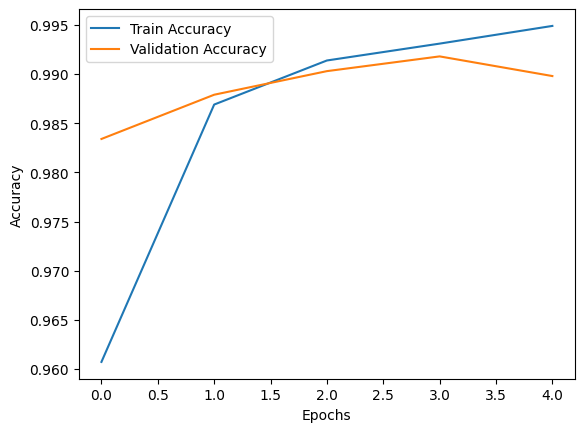

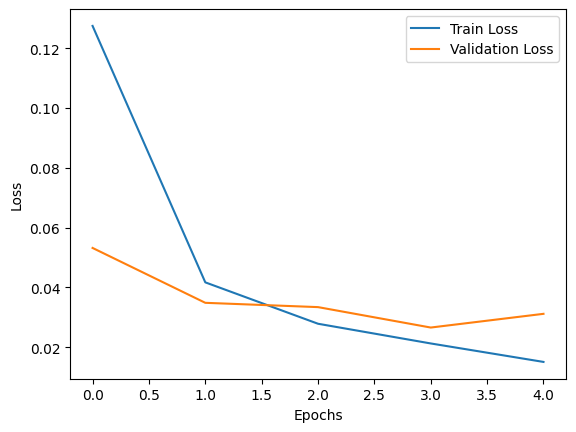

In [7]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
# Test with a single image from the test set
sample_image = X_test[0]
sample_label = y_test[0]

# Predict the digit
prediction = model.predict(sample_image.reshape(1, 28, 28, 1))
predicted_class = prediction.argmax()

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Class: 7


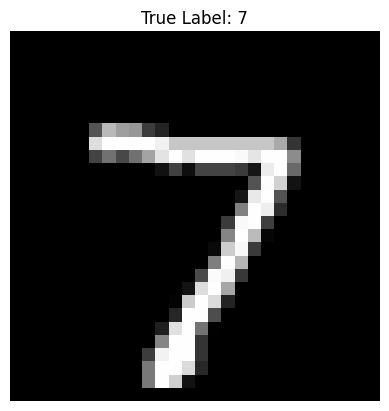

In [9]:
# Display the sample image
import matplotlib.pyplot as plt

plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True Label: {sample_label.argmax()}")
plt.axis('off')
plt.show()